<a href="https://colab.research.google.com/github/N1ckg4m3s/Calculo-de-Metricas-de-Avaliacao-de-Aprendizado/blob/main/Metricas_de_avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seção para avaliação do modelo feito no trabalho anterior

In [ ]:
# importações
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [ ]:
# Valores da rede neural
y_pred_prob = model_new.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
print(cm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[5 1]
 [0 9]]


In [ ]:
# Função para gerar todos os dados de Metricas
def gerar_metricas(Vp, Fp, Fn, Vn):
    Sensibilidade = Vp / (Vp + Fn)
    Especificidade = Vn / (Fp + Vn)
    Acuracia = (Vp + Vn) / (Vp + Vn + Fp + Fn)
    Precisao = Vp / (Vp + Fp)
    F1 = 2 * ((Precisao * Sensibilidade) / (Precisao + Sensibilidade))

    print(f" Sensibilidade: {Sensibilidade * 100:.2f}%")
    print(f" Especificidade: {Especificidade * 100:.2f}%")
    print(f" Acurácia: {Acuracia * 100:.2f}%")
    print(f" Precisão: {Precisao * 100:.2f}%")
    print(f" F-Score: {F1 * 100:.2f}%")

In [ ]:
VP_Geral = 0
FP_Geral = 0
VN_Geral = 0
FN_Geral = 0

# Calcular VP, FP, FN, VN para cada classe
for i in range(cm.shape[0]):
    # Verdadeiro Positivo (VP) para a classe i
    VP = cm[i, i]
    FP = cm[:, i].sum() - VP
    FN = cm[i, :].sum() - VP
    VN = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - VP)

    print(f"Métricas para classe {i}:")
    gerar_metricas(VP, FP, FN, VN)

    print("")

    VP_Geral += VP
    FP_Geral += FP
    VN_Geral += VN
    FN_Geral += FN

print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Métricas geral:")
gerar_metricas(VP_Geral, FP_Geral, FN_Geral, VN_Geral)

Métricas para classe 0:
 Sensibilidade: 83.33%
 Especificidade: 100.00%
 Acurácia: 93.33%
 Precisão: 100.00%
 F-Score: 90.91%

Métricas para classe 1:
 Sensibilidade: 100.00%
 Especificidade: 83.33%
 Acurácia: 93.33%
 Precisão: 90.00%
 F-Score: 94.74%

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Métricas geral:
 Sensibilidade: 93.33%
 Especificidade: 93.33%
 Acurácia: 93.33%
 Precisão: 93.33%
 F-Score: 93.33%



Curva de ROC 2


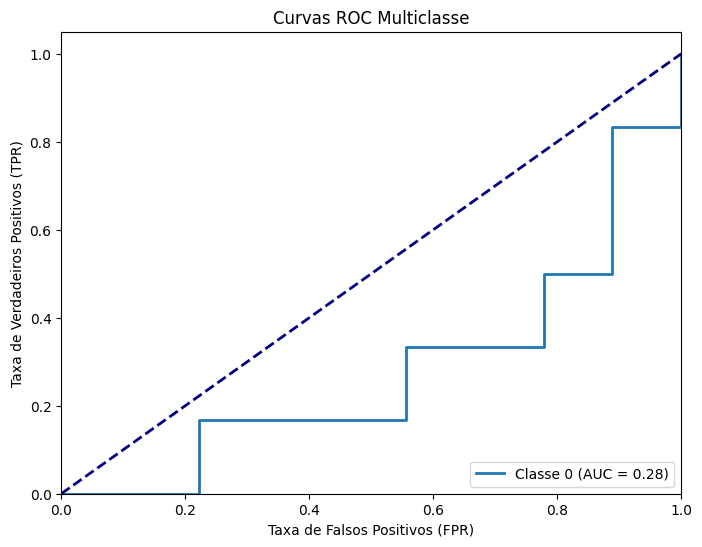

In [ ]:
# Gerando o grafico da curva de roc
print('')
print('Curva de ROC',cm.shape[0])

y_bin = label_binarize(y_true, classes=[0, 1])
y_prob = y_pred_prob[:, 1]

# Inicializar o gráfico
plt.figure(figsize=(8, 6))

# Para cada classe, calcular a curva ROC e a AUC
for i in range(y_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)

    # Plotar a curva ROC para a classe i
    plt.plot(fpr, tpr, lw=2, label=f'Classe {i} (AUC = {roc_auc:.2f})')

# Plotar a linha de aleatoriedade
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adicionar rótulos e título
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC Multiclasse')
plt.legend(loc="lower right")

# Mostrar o gráfico
plt.show()
